# **5 – Model Evaluation**

## Objectives
* Evaluate how well the trained CNN model performs on test data set
* Generate key performance metrics (accuracy, loss, confusion matrix, classification report)

## Inputs
* Trained model 
* Test dataset

## Outputs
* Evaluation metrics 
* Learning curve plots 
* Predictions on test images

---

# Change working directory

Change the working directory from its current folder to its parent folder

In [1]:
import os

project_dir = r"C:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves"

os.chdir(project_dir)

print(f" Current working directory is now: {os.getcwd()}")

 Current working directory is now: C:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves


Confirm the new current directory

In [2]:
current_dir = os.getcwd()
current_dir

'C:\\Users\\amyno\\OneDrive\\Documents\\CherryLeafProject\\milestone-project-mildew-detection-in-cherry-leaves'

---

# Load model and test data

Load the pre trained model to start the evaluation

Import tensorflow

In [3]:
import tensorflow as tf

Load the model from the output directory 

In [4]:
import os

os.makedirs("outputs/models", exist_ok=True)

Import load model from tensorflow

In [5]:
from tensorflow.keras.models import load_model

In [6]:
model = load_model("outputs/models/cherry_leaf_model.keras")
print("Model loaded successfully.")

Model loaded successfully.


Load and ready the test data set

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
test_ds = image_dataset_from_directory(
    "inputs/dataset/test",
    image_size=(256, 256),
    batch_size=32
)

Found 632 files belonging to 2 classes.


This will bring the test data set we need to evaluate the model into this notebook. The format of size and batch amount remains the same

Prefetch for performance optimisation

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

The model is now saved locally and loaded into this notebook ready for the next step of evaluating it's performance against the test data set

In [10]:
import pickle

with open('outputs/models/training_history.pkl', 'rb') as file:
    history_data = pickle.load(file)

print("history loaded")

history loaded


---

# Evaluate model against test data

Evaluate the model's performance using the unused test dataset. This will give the model's accuracy and loss on new data

In [11]:
test_loss, test_accuracy = model.evaluate(test_ds) # code inspired by stack overflow and ref. in readme (1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6105 - loss: 732.2192
Test Accuracy: 0.6203
Test Loss: 725.7076


The CNN model showed signs of underfitting, with a test accuracy of only 54%, which is disappointingly low. This reflects the model's simplicity and lack of advanced techniques

---

# Plot loss and accuracy learning curves

In [12]:
import matplotlib.pyplot as plt

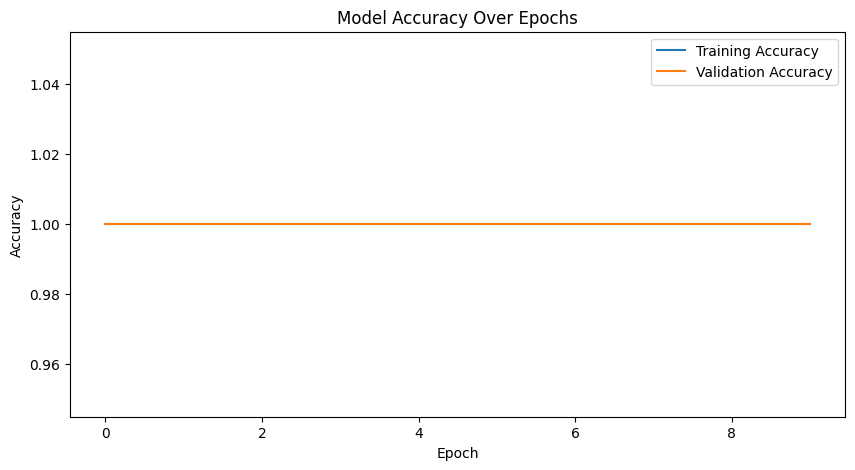

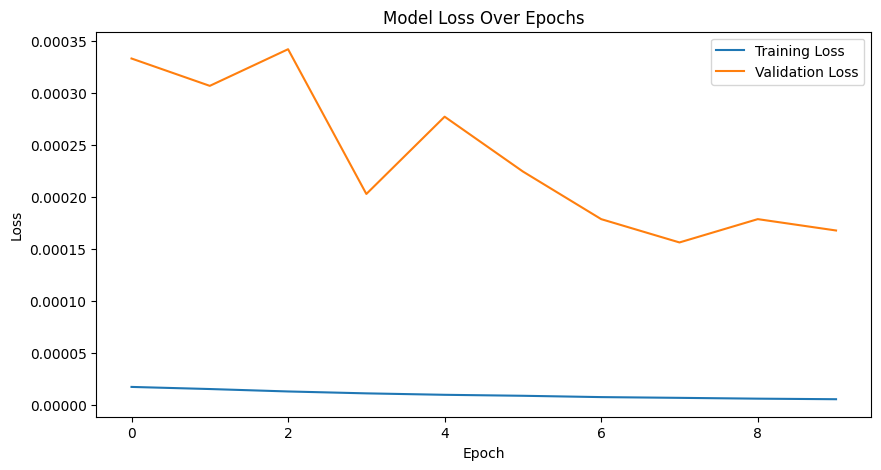

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# code inspired by pytorch and ref. in readme (2)

plt.figure(figsize=(10, 5))
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

---

# Conclusions and next steps

## Conclusions
* The trained model was successfully loaded for evaluation purposes
* The model's performance was evaluated on the test dataset, providing final accuracy and loss metrics.
* The test accuracy was significantly lower than the training accuracy, confirming overfitting in the development phase
* Performance plots of training and validation metrics were generated to support the evaluation.
* Key insights into the model's limitations and opportunities for optimisation were identified

## Next steps
* Develop a Streamlit dashboard to present the project findings and allow users to make live predictions.
* Implement a user interface for image uploads and predictions.
* Include visualisations of model performance and findings within the dashboard.